# Importing libraries

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Train and Test datasets

In [138]:
import os
os.chdir("D:\Datasets\DATA-SET")

In [139]:
df1=pd.read_csv('employee_survey_data.csv')
df1

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


# Exploratory Data Analysis(EDA)

In [140]:
df1.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [141]:
df1.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [143]:
df1.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [144]:
df1.isnull().mean()

EmployeeID                 0.000000
EnvironmentSatisfaction    0.005669
JobSatisfaction            0.004535
WorkLifeBalance            0.008617
dtype: float64

In [145]:
df1

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [146]:
df1['EnvironmentSatisfaction']=df1['EnvironmentSatisfaction'].fillna(df1['EnvironmentSatisfaction'].mean())

In [147]:
df1['JobSatisfaction']=df1['JobSatisfaction'].fillna(df1['JobSatisfaction'].mean())

In [148]:
df1['WorkLifeBalance']=df1['WorkLifeBalance'].fillna(df1['WorkLifeBalance'].mean())

In [149]:
df1.columns

Index(['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance'],
      dtype='object')

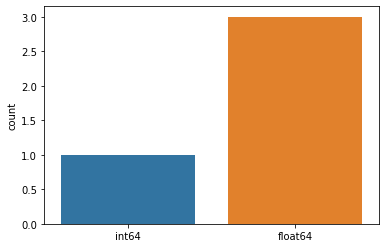

In [150]:
sns.countplot(df1.dtypes.map(str))
plt.show()

In [151]:
df1.dtypes.value_counts()

float64    3
int64      1
dtype: int64

In [152]:
df1['JobSatisfaction']=df1['JobSatisfaction'].astype(int)

In [153]:
df1['WorkLifeBalance']=df1['WorkLifeBalance'].astype(int)

In [154]:
df1.dtypes

EmployeeID                   int64
EnvironmentSatisfaction    float64
JobSatisfaction              int32
WorkLifeBalance              int32
dtype: object

In [155]:
df1['EmployeeID'].unique()

array([   1,    2,    3, ..., 4408, 4409, 4410], dtype=int64)

In [156]:
df1 = df1.drop('EnvironmentSatisfaction', axis = 1)

In [157]:
df1

,EmployeeID,JobSatisfaction,WorkLifeBalance
0,1,4,2
1,2,2,4
2,3,2,1
3,4,4,3
4,5,1,3
...,...,...,...
4405,4406,1,3
4406,4407,4,3
4407,4408,3,3
4408,4409,1,3


In [158]:
df1['JobSatisfaction'].unique()

array([4, 2, 1, 3])

# Data visualizations

### Data visualisations using distplot,boxplot(because distplot and boxplot shows how data is distributed and if there are any outliers

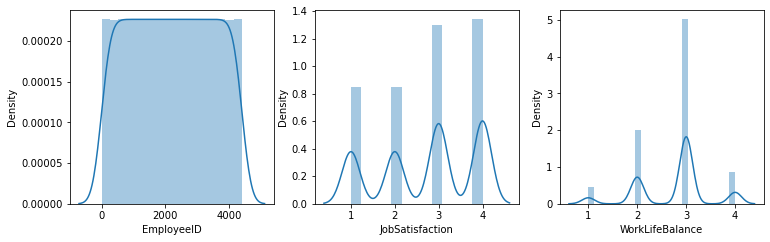

In [159]:
count=1
plt.subplots(figsize=(30,25))
for i in df1.columns:
    if df1[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.distplot(df1[i])
        count+=1

plt.show()

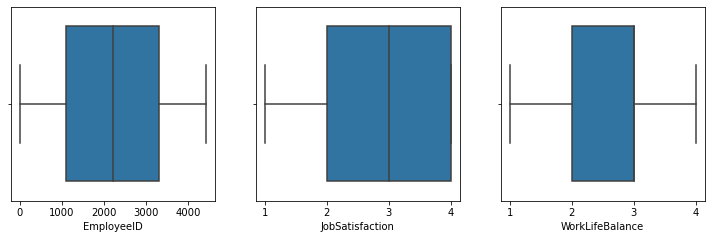

In [160]:
count=1
plt.subplots(figsize=(30,25))
for i in df1.columns:
    if df1[i].dtypes!='object':
        plt.subplot(6,7,count)
        sns.boxplot(df1[i])
        count+=1

plt.show()

In [161]:
df1.dtypes

EmployeeID         int64
JobSatisfaction    int32
WorkLifeBalance    int32
dtype: object

# Train test and split 

In [162]:
X = df1.iloc[:, 0:1].values
y = df1.iloc[:, 1]

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Accuracies of different algorithms applied

In [164]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [165]:
forest.score(X_train, y_train)

0.9996976111279104

In [166]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [167]:
forest.score(X_train, y_train)

1.0

In [168]:
forest.score(X_test, y_test)

0.26745240253853125

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from math import sqrt
%matplotlib inline

In [170]:
X = df1.iloc[:, 0:1].values
y = df1.iloc[:, 1]

In [171]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state =1) 

In [172]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [173]:
tree_classifier.score(X_train, y_train)

0.3773813123677049

In [174]:
y_tree_pred = tree_classifier.predict(X_test)

In [175]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_tree_pred)

In [176]:
acc

0.2883046237533998